In [142]:
import ROOT
from matplotlib import pyplot as plt
import pandas as pd

In [143]:
file_name = "histograms_pt_0_9.root"
my_file = ROOT.TFile.Open(file_name)

In [144]:
# triplet numbering
triplet_ids  = [i for i in range(68)]

In [145]:
my_file.cd()
dca_histograms = {}
histograms = {}
for h in my_file.GetListOfKeys():
    hist = h.ReadObj()
    histograms[hist.GetName()] = hist
    

In [146]:
# loop over all histograms and retrieve mean and std dev

df = pd.DataFrame(columns=["cut", "entries", "mean", "std dev", "triplet ID", "layer 1", "layer 2", "layer 3"])
cuts = ["dca", "theta"]
for cut in cuts:
    for triplet_id in triplet_ids:
        mean = 0.0
        stddev = 0.0
        entries = 0
        hist_name = ""
        if cut == "theta":
            hist_name = cut + "_" + str(triplet_id)
        else:    
            hist_name = "dca_"+str(triplet_id)
            
        mean = histograms[hist_name].GetMean()
        stddev = histograms[hist_name].GetStdDev()
        entries = histograms[hist_name].GetEntries()
            
        df_tmp = pd.DataFrame({"cut": cut, 
                               "entries": entries, 
                               "mean": mean, 
                               "std dev":stddev, 
                               "triplet ID":triplet_id, 
                               "layer 1": -1,
                               "layer 2": -1,
                               "layer 3": -1}, index=[0])
        df = pd.concat([df, df_tmp], ignore_index=True)
        
        

/var/folders/0m/wpyd3rf50ndd6p3t8qxnqkjm0000gn/T/ipykernel_71395/325841593.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, df_tmp], ignore_index=True)


In [147]:
df

,cut,entries,mean,std dev,triplet ID,layer 1,layer 2,layer 3
0,dca,18145.0,61.352028,86.458737,0,-1,-1,-1
1,dca,1317.0,61.237435,92.629644,1,-1,-1,-1
2,dca,2422.0,47.553600,75.168018,2,-1,-1,-1
3,dca,7936.0,56.260739,85.848914,3,-1,-1,-1
4,dca,568.0,57.824553,81.227764,4,-1,-1,-1
...,...,...,...,...,...,...,...,...
131,theta,31.0,1.077724,0.821099,63,-1,-1,-1
132,theta,152.0,0.616759,0.601291,64,-1,-1,-1
133,theta,8078.0,0.027615,0.170219,65,-1,-1,-1
134,theta,244.0,0.699862,0.645483,66,-1,-1,-1


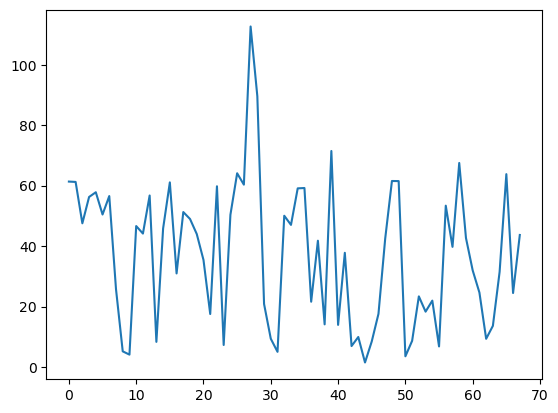

In [148]:
plt.plot(df.loc[df["cut"]=="dca", "triplet ID"], df.loc[df["cut"]=="dca","mean"])

In [149]:
# encoding the triplets
layerPairs = [
      0, 1, 0, 4, 0, 7,              # BPIX1 (3)
      1, 2, 1, 4, 1, 7,              # BPIX2 (6)
      4, 5, 7, 8,                    # FPIX1 (8)
      2, 3, 2, 4, 2, 7, 5, 6, 8, 9,  # BPIX3 & FPIX2 (13)
      0, 2, 1, 3,                    # Jumping Barrel (15)
      0, 5, 0, 8,                    # Jumping Forward (BPIX1,FPIX2)
      4, 6, 7, 9,                     # Jumping Forward (19)
      3, 10,                          # BPIX4 (20)
      4, 10, 5, 10, 6, 10,            # Pixel Positive Endcap (23)
      7, 10, 8, 10, 9, 10,            # Pixel Negative Endcap (26)
      10, 11,                         # TIB1 (27) 
      2, 10, 3, 11,                   # Jumping from Pixel Barrel (29)
      4, 11, 5, 11, 6, 11,            # Jumping from Pixel Positive Endcap (32)
      7, 11, 8, 11, 9, 11             # Jumping from Pixel Negative Endcap (35)
]

layerTriples = [0, 3, 0, 4, 0, 5, 0, 14, 1, 6, 1, 17, 1, 20, 1, 29, 2, 7, 2, 18, 2, 23, 2, 32, 13, 8, 13, 9, 13, 10, 13, 27, 15, 11, 15, 21, 15, 30, 16, 12, 16, 24, 16, 33, 3, 8, 3, 9, 3, 10, 3, 27, 4, 6, 4, 17, 4, 20, 4, 29, 5, 7, 5, 18, 5, 23, 5, 32, 14, 19, 14, 28, 6, 11, 6, 21, 6, 30, 17, 22, 17, 31, 20, 26, 7, 12, 7, 24, 7, 33, 18, 25, 18, 34, 23, 26, 8, 19, 8, 28, 9, 6, 9, 17, 9, 20, 9, 29, 10, 7, 10, 18, 10, 23, 10, 32, 27, 26, 11, 22, 11, 31, 21, 26, 12, 25, 12, 34, 24, 26, 19, 26, 22, 26, 25, 26]

In [150]:
counter = 0 
triplets = {}
for triplet_index, triplet in enumerate(layerTriples): 
    if (triplet_index % 2 == 0):
        doublet_index_1 = 2 * layerTriples[triplet_index] 
        doublet_index_2 = doublet_index_1 + 1
        [triplet_index + 1]
        triplets[counter] = (layerPairs[doublet_index_1], layerPairs[doublet_index_2], layerTriples[triplet_index + 1])
        counter += 1


# setting up a triplet mask
triplet_mask = []
for i in range(len(triplets)):
    triplet_mask.append(1)

for idx, (key, triplet) in enumerate(triplets.items()):
    print(key, triplet)
    if ((10 in triplet) or (11 in triplet)):
        pass
    else:
       triplet_mask[idx] = 0


#setting the layes in the dataframe
for idx, (key, triplet) in enumerate(triplets.items()):
    df.loc[df["triplet ID"] == idx, "layer 1"] = triplet[0]
    df.loc[df["triplet ID"] == idx, "layer 2"] = triplet[1]
    df.loc[df["triplet ID"] == idx, "layer 3"] = triplet[2]


0 (0, 1, 3)
1 (0, 1, 4)
2 (0, 1, 5)
3 (0, 1, 14)
4 (0, 4, 6)
5 (0, 4, 17)
6 (0, 4, 20)
7 (0, 4, 29)
8 (0, 7, 7)
9 (0, 7, 18)
10 (0, 7, 23)
11 (0, 7, 32)
12 (0, 2, 8)
13 (0, 2, 9)
14 (0, 2, 10)
15 (0, 2, 27)
16 (0, 5, 11)
17 (0, 5, 21)
18 (0, 5, 30)
19 (0, 8, 12)
20 (0, 8, 24)
21 (0, 8, 33)
22 (1, 2, 8)
23 (1, 2, 9)
24 (1, 2, 10)
25 (1, 2, 27)
26 (1, 4, 6)
27 (1, 4, 17)
28 (1, 4, 20)
29 (1, 4, 29)
30 (1, 7, 7)
31 (1, 7, 18)
32 (1, 7, 23)
33 (1, 7, 32)
34 (1, 3, 19)
35 (1, 3, 28)
36 (4, 5, 11)
37 (4, 5, 21)
38 (4, 5, 30)
39 (4, 6, 22)
40 (4, 6, 31)
41 (4, 10, 26)
42 (7, 8, 12)
43 (7, 8, 24)
44 (7, 8, 33)
45 (7, 9, 25)
46 (7, 9, 34)
47 (7, 10, 26)
48 (2, 3, 19)
49 (2, 3, 28)
50 (2, 4, 6)
51 (2, 4, 17)
52 (2, 4, 20)
53 (2, 4, 29)
54 (2, 7, 7)
55 (2, 7, 18)
56 (2, 7, 23)
57 (2, 7, 32)
58 (2, 10, 26)
59 (5, 6, 22)
60 (5, 6, 31)
61 (5, 10, 26)
62 (8, 9, 25)
63 (8, 9, 34)
64 (8, 10, 26)
65 (3, 10, 26)
66 (6, 10, 26)
67 (9, 10, 26)


,cut,entries,mean,std dev,triplet ID,layer 1,layer 2,layer 3
0,dca,18145.0,61.352028,86.458737,0,0,1,3
1,dca,1317.0,61.237435,92.629644,1,0,1,4
2,dca,2422.0,47.553600,75.168018,2,0,1,5
3,dca,7936.0,56.260739,85.848914,3,0,1,14
4,dca,568.0,57.824553,81.227764,4,0,4,6
...,...,...,...,...,...,...,...,...
131,theta,31.0,1.077724,0.821099,63,8,9,34
132,theta,152.0,0.616759,0.601291,64,8,10,26
133,theta,8078.0,0.027615,0.170219,65,3,10,26
134,theta,244.0,0.699862,0.645483,66,6,10,26


In [161]:
hasStrip = (df["layer 2"] == 10) | (df["layer 2"] == 11) | (df["layer 3"] == 10) | (df["layer 3"] == 11)
hasNoStrip =  (df["layer 2"] != 10) & (df["layer 2"] != 11) & (df["layer 3"] != 10) & (df["layer 3"] != 11)

In [152]:
df[hasStrip & (df["entries"] > 30) & (df["cut"] == "dca")]

,cut,entries,mean,std dev,triplet ID,layer 1,layer 2,layer 3
14,dca,1189.0,45.846091,74.502941,14,0,2,10
16,dca,126.0,30.980823,51.401489,16,0,5,11
24,dca,1235.0,50.373951,79.238855,24,1,2,10
41,dca,667.0,37.805528,76.036585,41,4,10,26
47,dca,533.0,42.495274,68.908753,47,7,10,26
58,dca,16270.0,67.508458,88.421314,58,2,10,26
61,dca,239.0,24.650971,44.979046,61,5,10,26
64,dca,152.0,31.490722,59.970655,64,8,10,26
65,dca,8078.0,63.811079,89.187030,65,3,10,26
66,dca,244.0,24.502001,36.689656,66,6,10,26


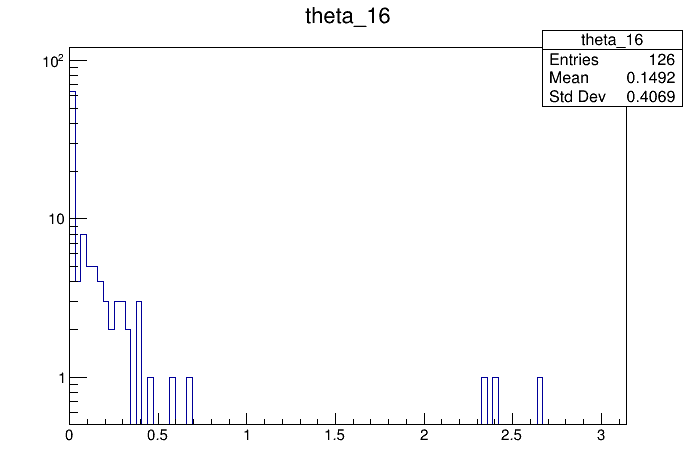

In [157]:
c = ROOT.TCanvas()
histograms["theta_16"].Draw()
c.SetLogy()
c.Draw()

In [162]:
df[hasNoStrip & (df["entries"] > 00) & (df["cut"] == "dca")]

,cut,entries,mean,std dev,triplet ID,layer 1,layer 2,layer 3
0,dca,18145.0,61.352028,86.458737,0,0,1,3
1,dca,1317.0,61.237435,92.629644,1,0,1,4
2,dca,2422.0,47.553600,75.168018,2,0,1,5
3,dca,7936.0,56.260739,85.848914,3,0,1,14
4,dca,568.0,57.824553,81.227764,4,0,4,6
5,dca,489.0,50.466760,76.481281,5,0,4,17
6,dca,2713.0,56.567301,81.890732,6,0,4,20
7,dca,689.0,25.776473,49.352296,7,0,4,29
8,dca,32.0,5.219196,4.229261,8,0,7,7
9,dca,66.0,4.136306,3.418138,9,0,7,18
